### 모델
- 피 쳐 : 33개 
- 타 겟 : G3

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, LabelEncoder,RobustScaler,PolynomialFeatures
import heejin
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

1. school 학교
2. sex 성별
3. age 나이 -> 15~22
4. address 주소 -> U(도시), R(농촌)
5. famsize 가족 크기
6. Pstatus 부모의 동거 여부 ->  T:동거 A:동거 X
7. Medu 어머니의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
8. Fedu 아버지의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
9. Mjob 어머니의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)
10. Fjob 아버지의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)
11. reason 본 학교를 선택한 이유 -> 집에 가까운, 학교 평판, 과정, 선호, 기타
12. guardian 학생의 보호자 -> mother, father, 기타
13. traveltime 이동 시간 -> 15분 이상 -> yes , no
14. studytime 학습 시간 -> 1:2시간이하 2:2-5시간 3:5-10시간 4:10시간이상
15. failures 낙제 횟수 -> 1,2,3 or 4(1,2,3 아니면 4)
16. schoolsup 추가교육(보충수업?)
17. famsup 가족 교육 지원
18. paid 수학 공부 추가 지원 여부
19. activities 과외 활동
20. nursery 유치원 다닌 유무
21. higher 고등교육 희망 유무
22. internet 인터넷 접속
23. romantic 이성교제
24. famrel 가족관계 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음
25. freetime 자유시간 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
26. goout 외출 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
27. Dalc 일과 중 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
28. Walc 주말 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
29. health 현재 건강 상태 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음
30. absences 결석 횟수 -> 0~93
31. G1 1학기 수학 성적 -> 0~20
32. G2 2학기 수학 성적 -> 0~20
33. G3 최종 성적 -> 0~20


In [71]:
stuDF = pd.read_csv('../data/student-mat.csv', sep = ';')
stuDF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [26]:
stuDF.corr(numeric_only=True)['G3'].abs().sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

In [72]:
targetSR = stuDF[stuDF.columns[-1]]
featureDF = stuDF[stuDF.columns[:-1]]

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

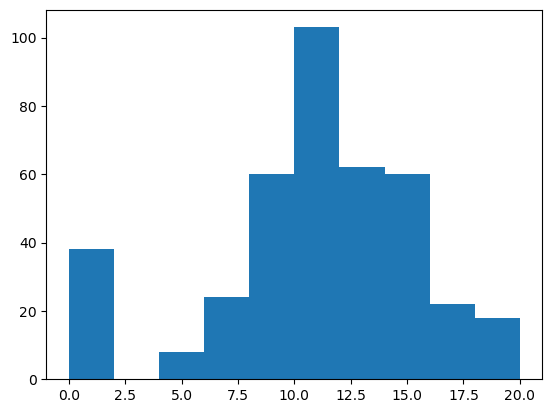

In [60]:
plt.hist(targetSR)

In [77]:
targetSR.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba559dd7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5a896b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5aad4e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5a896160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5a8963a0>],
 'means': []}

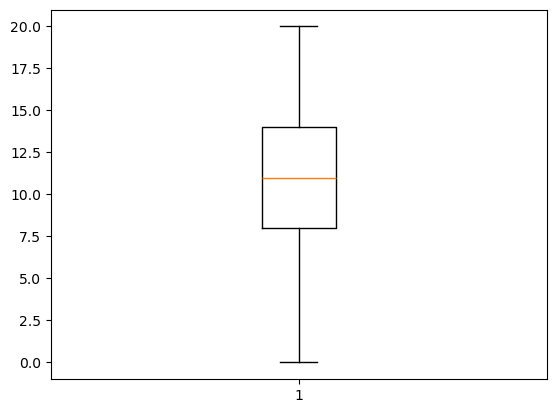

In [76]:
 = plt.boxplot(targetSR)

In [28]:
for i in stuDF.columns:
    print(f'{i} => {stuDF[i].unique()} {stuDF[i].dtype}')

# encoding - 범주형을 수치형으로 바꿔주는 작업
# 명목형 변수는 원핫 인코딩
# 범주형 중 두개로 나누어 지는 경우는 0과 1로 변환
# ex) yes => 1 / no => 0

# 성적과 비례할 것 같은 값을 1로 변환 / 반비례할 것 같은 값을 0으로 변환
# Mjob -> at_home : 1, 그 외 : 0
# Fjob -> at_home : 0, 그 외 : 1
# school, sex, adress, famsize, Pstatus, reason, guardian - onehotencoding
# yes -> 1
# schoolsup, famsup, paid,activities, nursery, higher
# no -> 1
# internet, romantic

school => ['GP' 'MS'] object
sex => ['F' 'M'] object
age => [18 17 15 16 19 22 20 21] int64
address => ['U' 'R'] object
famsize => ['GT3' 'LE3'] object
Pstatus => ['A' 'T'] object
Medu => [4 1 3 2 0] int64
Fedu => [4 1 2 3 0] int64
Mjob => ['at_home' 'health' 'other' 'services' 'teacher'] object
Fjob => ['teacher' 'other' 'services' 'health' 'at_home'] object
reason => ['course' 'other' 'home' 'reputation'] object
guardian => ['mother' 'father' 'other'] object
traveltime => [2 1 3 4] int64
studytime => [2 3 1 4] int64
failures => [0 3 2 1] int64
schoolsup => ['yes' 'no'] object
famsup => ['no' 'yes'] object
paid => ['no' 'yes'] object
activities => ['no' 'yes'] object
nursery => ['yes' 'no'] object
higher => ['yes' 'no'] object
internet => ['no' 'yes'] object
romantic => ['no' 'yes'] object
famrel => [4 5 3 1 2] int64
freetime => [3 2 4 1 5] int64
goout => [4 3 2 1 5] int64
Dalc => [1 2 5 3 4] int64
Walc => [1 3 2 4 5] int64
health => [3 5 1 2 4] int64
absences => [ 6  4 10  2  0 16 14

In [30]:
(featureDF.dtypes == 'O').sum(),(featureDF.dtypes == 'int64').sum()


(17, 15)

In [31]:
len(featureDF['sex'].unique())

2

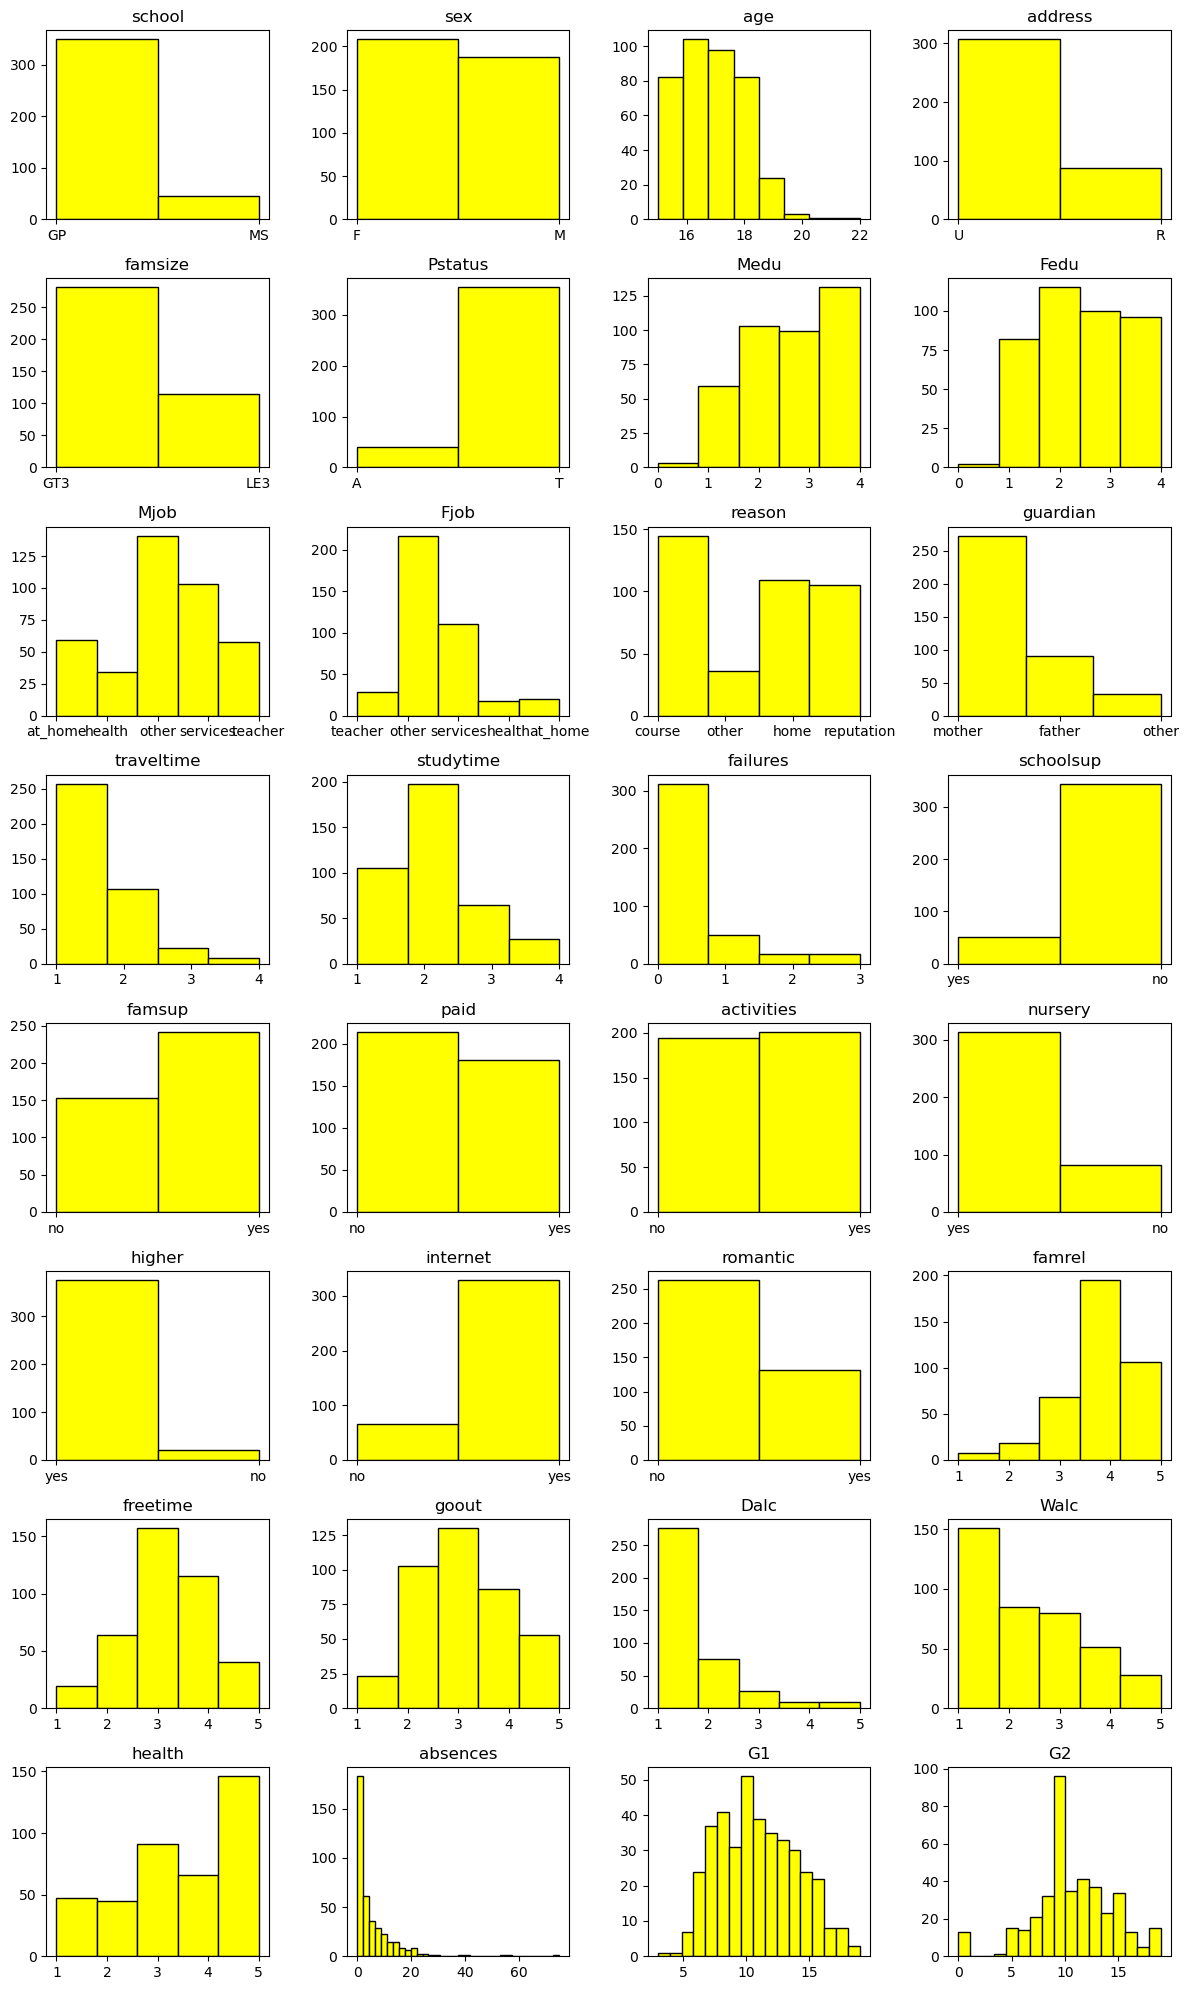

In [32]:
# hist맵 그리기
plt.figure(figsize = (12,20))
for n,i in enumerate(featureDF.columns):
    plt.subplot(8,4,n+1)
    plt.hist(stuDF[i], bins = len(featureDF[i].unique()),edgecolor='k', color = 'yellow')
    plt.title(f'{i}')
plt.tight_layout()
plt.show()

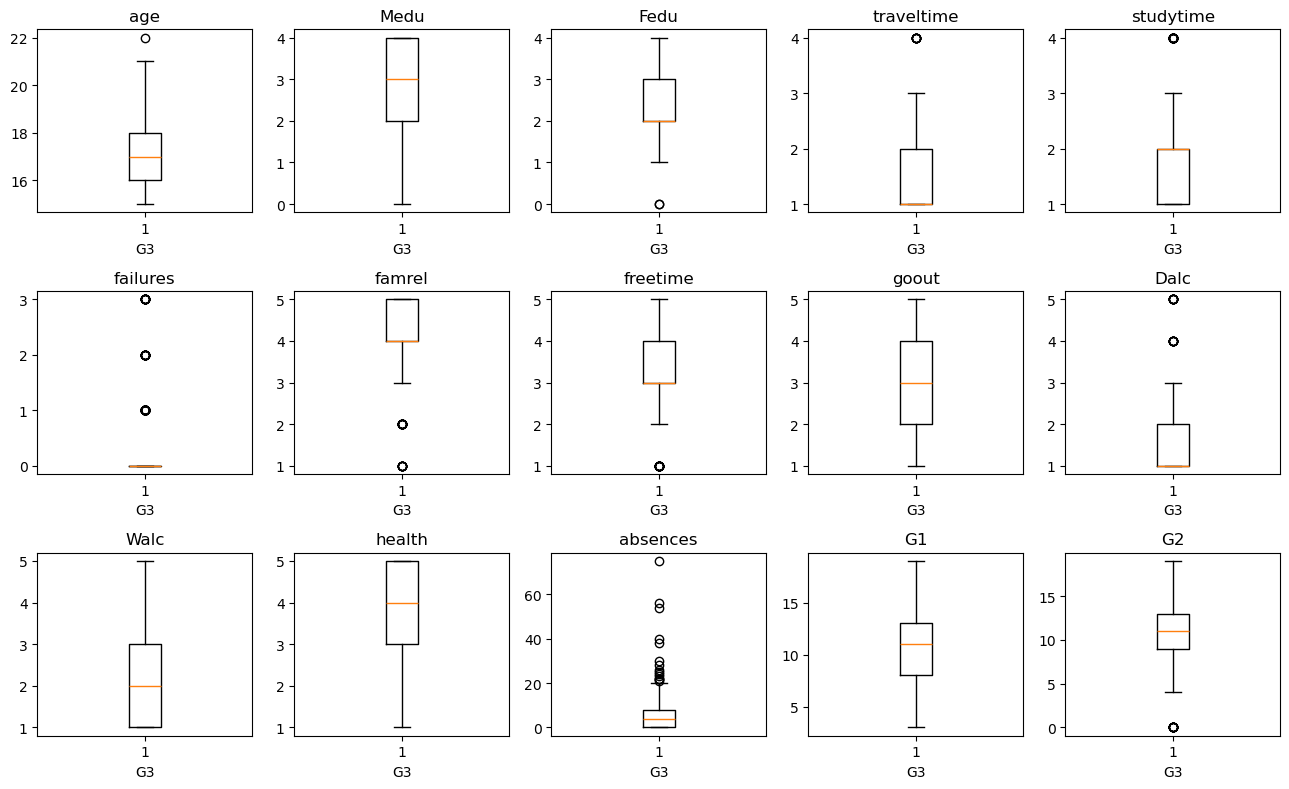

In [33]:
# int형인 데이터 boxplot
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.boxplot(stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()

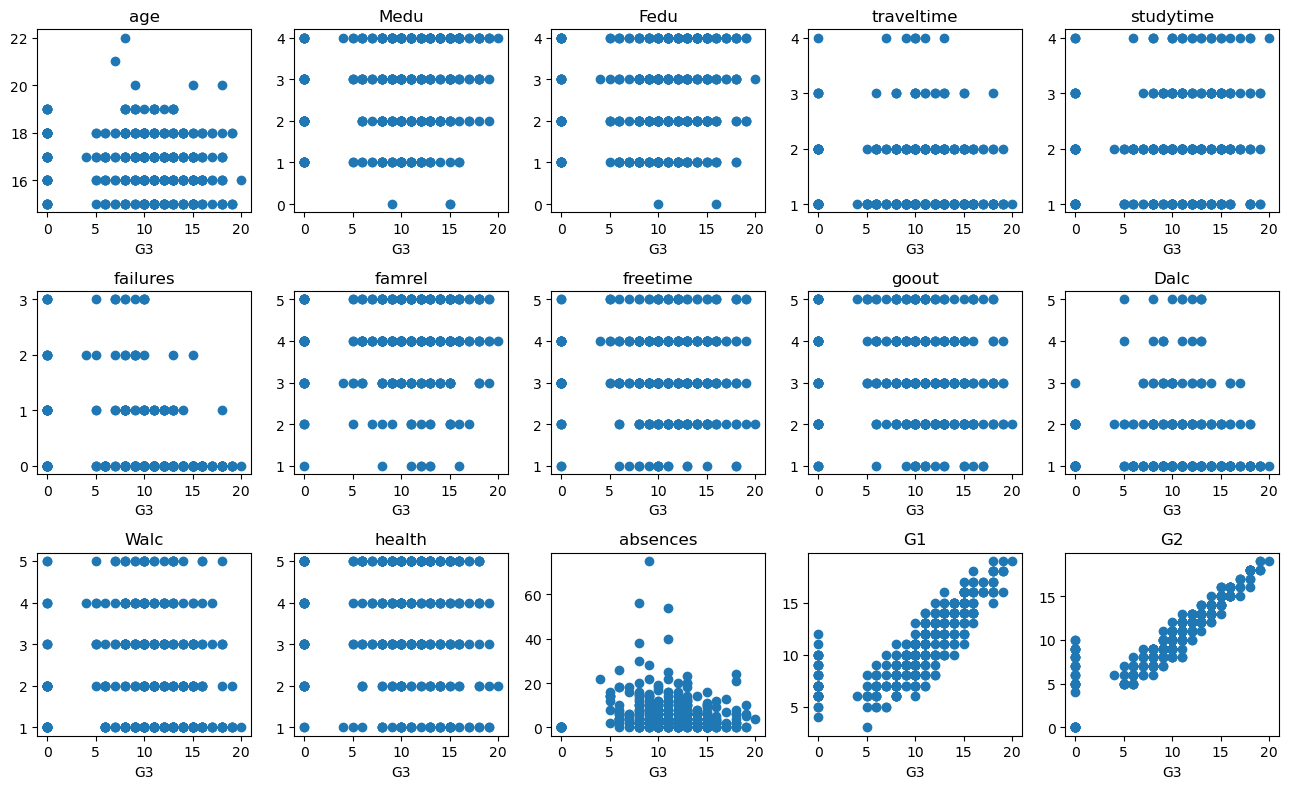

In [34]:
# scatter 그리기
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.scatter(targetSR,stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()
# age, failures, G1, G2
# 선형성을 띠는 데이터가 보이지 않음 -> 비선형모델로 해보자

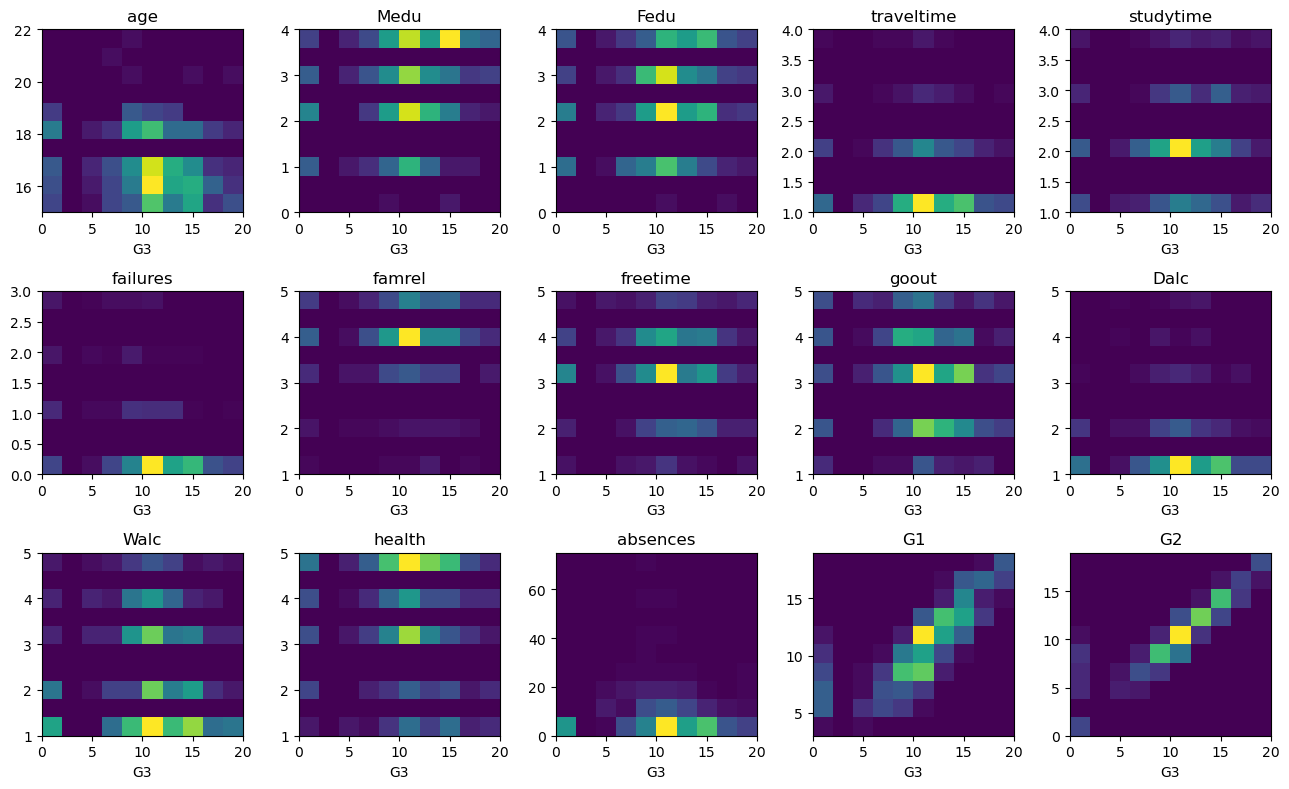

In [35]:
plt.figure(figsize = (13,8))
n = 1
for i in featureDF.columns:
    if featureDF[i].dtypes == 'int64':
        plt.subplot(3,5,n)
        plt.hist2d(targetSR,stuDF[i])
        plt.xlabel(targetSR.name)
        plt.title(f'{i}')
        n+=1
plt.tight_layout()
plt.show()

In [36]:
# 성적과 비례할 것 같은 값을 1로 변환 / 반비례할 것 같은 값을 0으로 변환
# Mjob -> at_home : 1, 그 외 : 0
# Fjob -> at_home : 0, 그 외 : 1
# school, sex, adress, famsize, Pstatus, reason, guardian - onehotencoding
# yes -> 1
# schoolsup, famsup, paid,activities, nursery, higher
# no -> 1
# internet, romantic

In [62]:
stuDF.loc[:, 'Mjob'] = (stuDF['Mjob'] == 'at_home').astype(int)
stuDF.loc[:, 'Fjob'] = (stuDF['Fjob'] != 'at_home').astype(int)
for i in ['schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher']:
    stuDF.loc[:,i] = (stuDF[i] == 'yes').astype(int)
for i in ['internet', 'romantic']:
    stuDF.loc[:,i] = (stuDF[i] != 'yes').astype(int)
encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian'])

In [73]:
stuDF.loc[featureDF['Mjob'] != 'at_home', 'Mjob'] = 'other'
stuDF.loc[featureDF['Fjob'] != 'at_home', 'Fjob'] = 'other'


encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian',
                                           'schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher',
                                            'internet', 'romantic','Mjob','Fjob'], drop_first=True)
encoded_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_other,Fjob_other
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,False,True,True,False,False,False,True
1,17,1,1,1,2,0,5,3,3,1,...,False,True,False,False,False,True,True,False,False,True
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,True,True,False,False,True
3,15,4,2,1,3,0,3,2,2,1,...,False,True,True,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,True,True,False,True,True,False,False,True,True
5,16,4,3,1,2,0,5,4,2,1,...,False,True,True,True,True,True,True,False,True,True
6,16,2,2,1,2,0,4,4,4,1,...,False,False,False,False,True,True,True,False,True,True
7,17,4,4,2,2,0,4,1,4,1,...,True,True,False,False,True,True,False,False,True,True
8,15,3,2,1,2,0,4,2,2,1,...,False,True,True,False,True,True,True,False,True,True
9,15,3,4,1,2,0,5,5,1,1,...,False,True,True,True,True,True,True,False,True,True


In [74]:
encoded_df.shape

(395, 36)

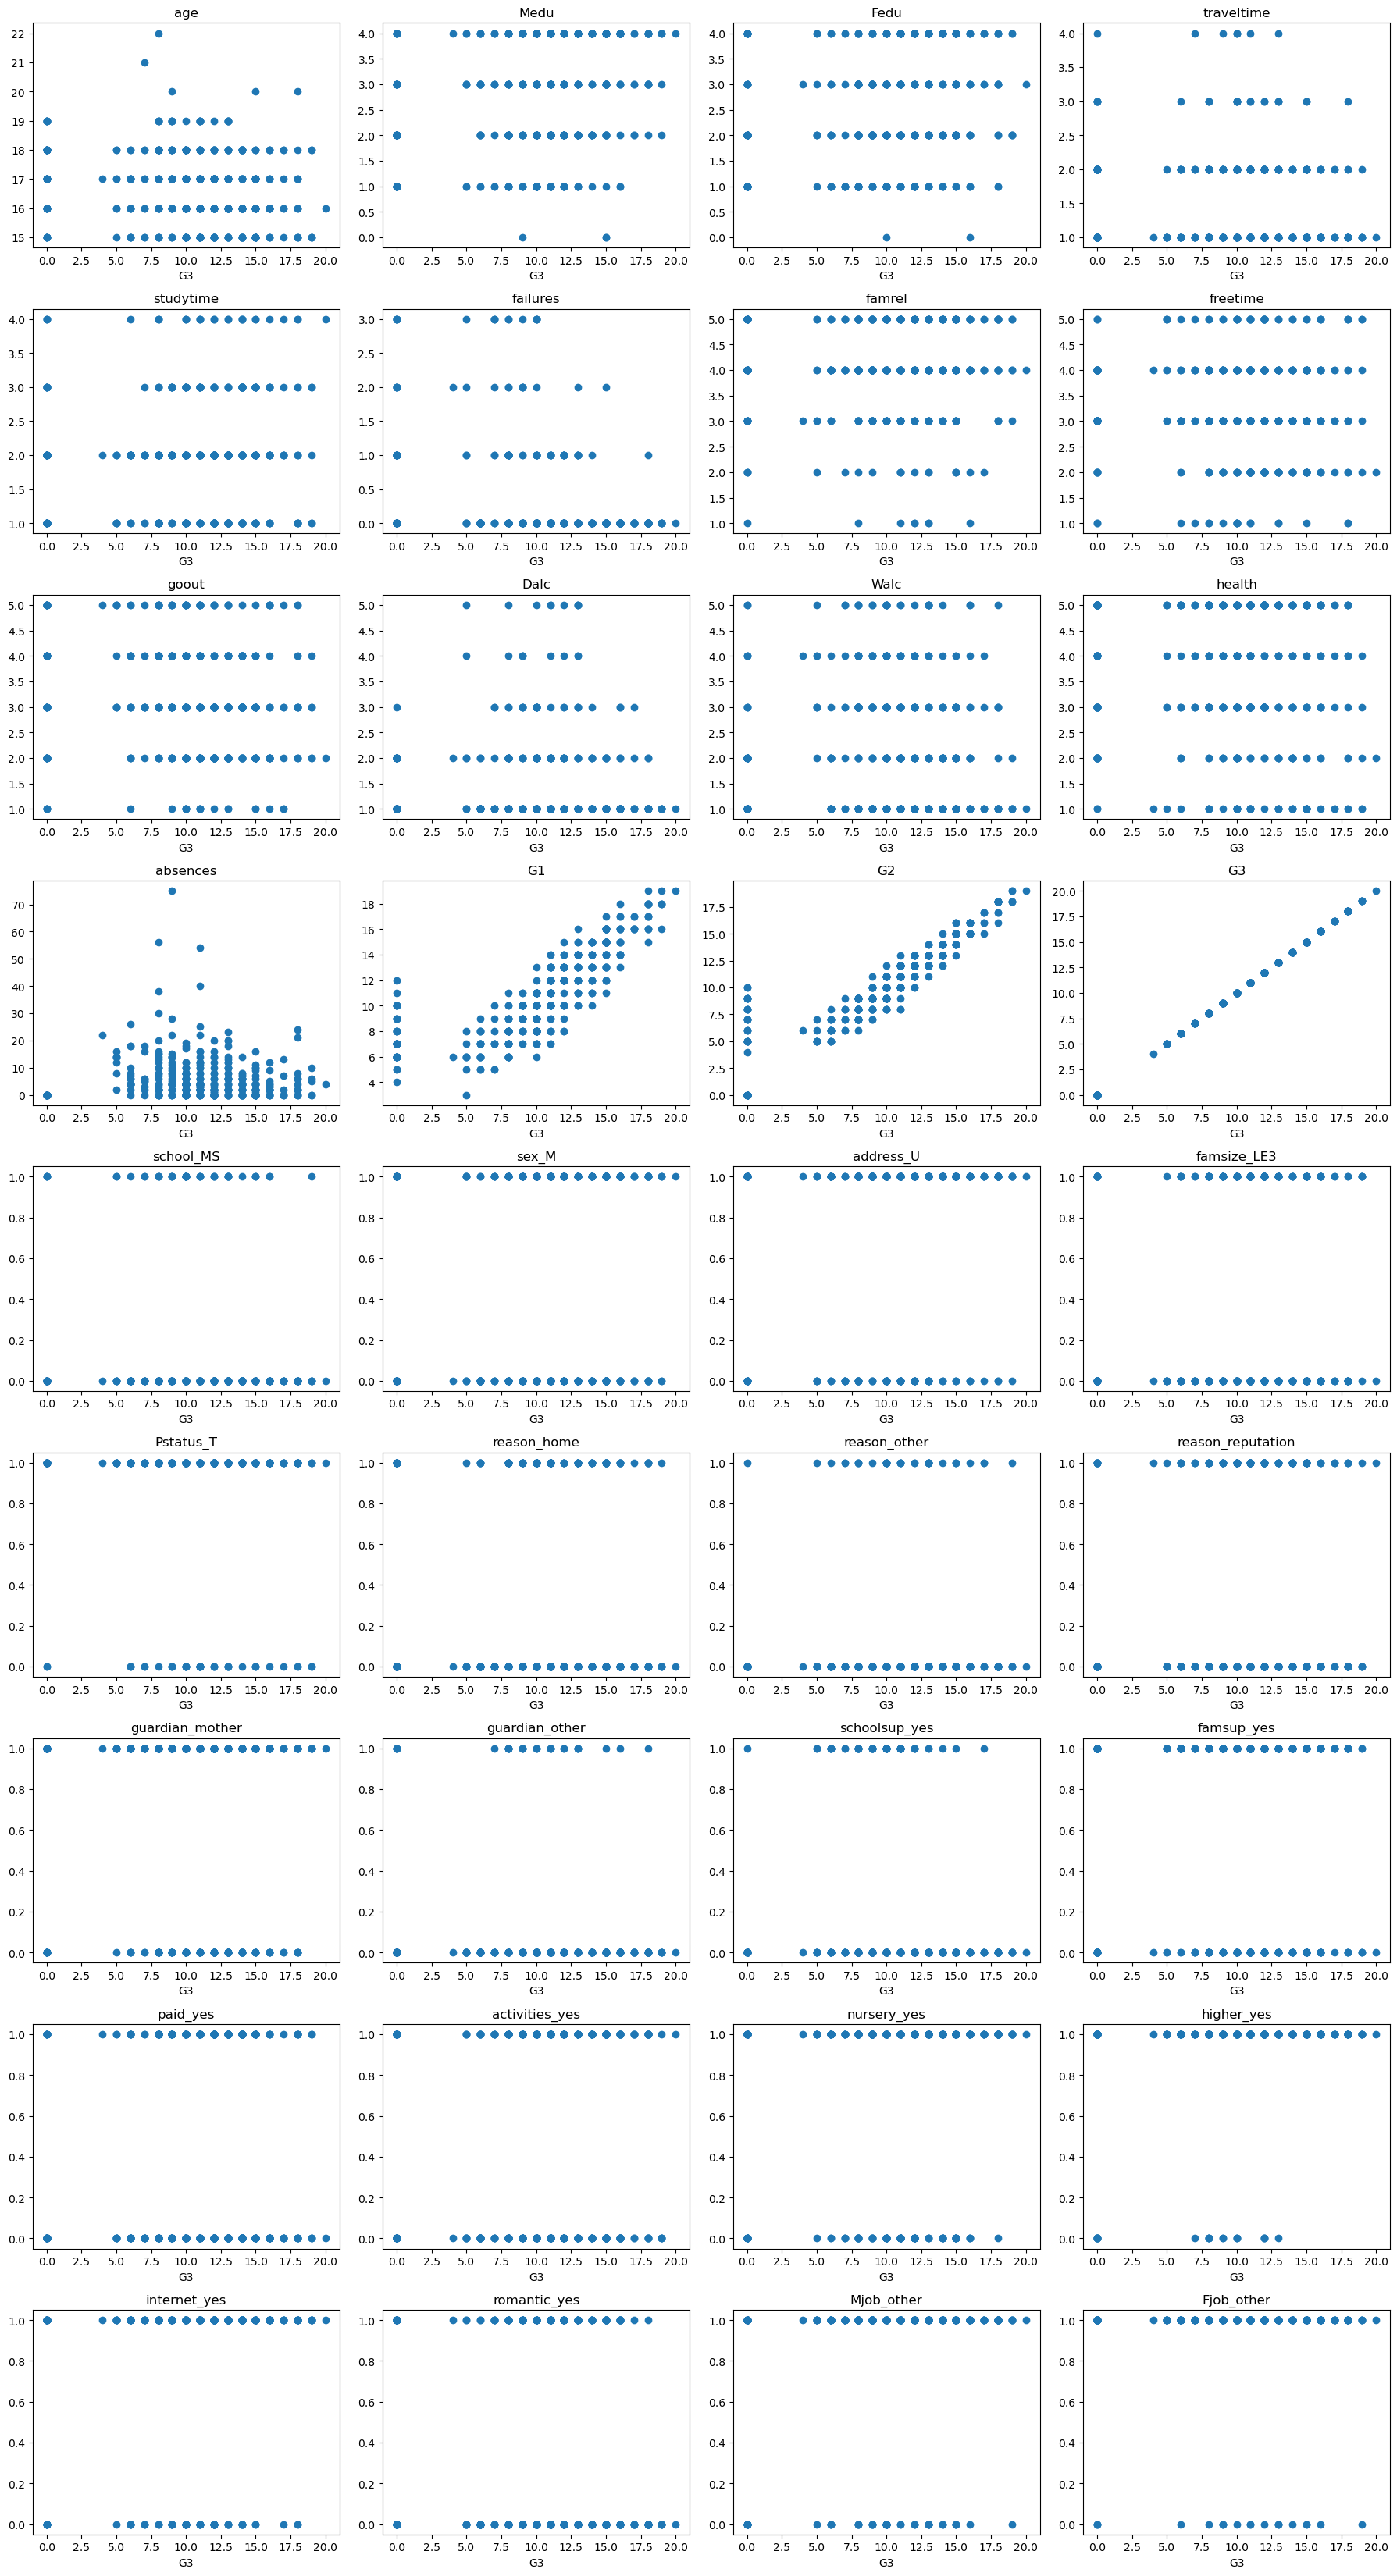

In [75]:
n = 1
plt.figure(figsize=(18,40))
for i in encoded_df.columns:
    plt.subplot(11,4,n)
    plt.scatter(targetSR,encoded_df[i])
    plt.xlabel(targetSR.name)
    plt.title(f'{i}')
    n+=1
plt.tight_layout()
plt.show()

In [38]:
encoded_df = pd.get_dummies(stuDF, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian'], drop_first=True)
encoded_df

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,...,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,1,1,2,2,0,1,0,...,False,False,True,False,False,False,False,False,True,False
1,17,1,1,1,1,1,2,0,0,1,...,False,False,True,False,True,False,False,False,False,False
2,15,1,1,1,1,1,2,3,1,0,...,False,False,True,True,True,False,True,False,True,False
3,15,4,2,0,1,1,3,0,0,1,...,False,False,True,False,True,True,False,False,True,False
4,16,3,3,0,1,1,2,0,0,1,...,False,False,True,False,True,True,False,False,False,False
5,16,4,3,0,1,1,2,0,0,1,...,False,True,True,True,True,False,False,True,True,False
6,16,2,2,0,1,1,2,0,0,0,...,False,True,True,True,True,True,False,False,True,False
7,17,4,4,0,1,2,2,0,1,1,...,False,False,True,False,False,True,False,False,True,False
8,15,3,2,0,1,1,2,0,0,1,...,False,True,True,True,False,True,False,False,True,False
9,15,3,4,0,1,1,2,0,0,1,...,False,True,True,False,True,True,False,False,True,False


In [48]:
encoded_df.corr()['G3'].abs().sort_values(ascending=False) # G2, G1, failures, Medu, higher_1

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_1             0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_1           0.129970
traveltime           0.117142
Mjob_1               0.115634
address_U            0.105756
sex_M                0.103456
paid_1               0.101996
internet_1           0.098483
studytime            0.097820
reason_reputation    0.095692
guardian_other       0.087774
schoolsup_1          0.082788
famsize_LE3          0.081407
health               0.061335
Pstatus_T            0.058009
Dalc                 0.054660
reason_other         0.052008
Walc                 0.051939
nursery_1            0.051568
famrel               0.051363
school_MS            0.045017
famsup_1             0.039157
absences             0.034247
guardian_mother      0.022338
reason_home          0.021359
activities

In [78]:
featureDF= encoded_df[['failures', 'Medu', 'higher_1']]

KeyError: "['higher_1'] not in index"

In [79]:
featureDF = stuDF[['failures','Medu','higher','age']]

In [80]:
random_state_list = []
for i in range(1,51):
    xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2,random_state=i)
    scaler = StandardScaler() # scaler 종류에 따른 큰 차이 없음
    scaler.fit(xtrain)
    xtrain_scaled = scaler.transform(xtrain)
    xtest_scaled = scaler.transform(xtest)
    model = LinearRegression() # model 종류에 따라 차이남
    model.fit(xtrain_scaled,ytrain)
    model.score(xtest_scaled,ytest)
    random_state_list.append(model.score(xtest_scaled,ytest))
max_score = max(random_state_list)
print(f'radom_state = {random_state_list.index(max_score)+1}\nscore : {max_score}')

max_random_state = random_state_list.index(max_score)+1

# 최적 random_state 값
# LinearRegression() : 46
# KNeighborsRegressor() : 49

ValueError: could not convert string to float: 'yes'

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,test_size=0.2, random_state=4)

In [53]:
# poly 최적의 파라미터 값 찾기

max_score = []
for b in [True,False]:
    for d in range(1,6):
        poly = PolynomialFeatures(interaction_only=b, degree=d)
        poly.fit(xtrain)
        xtrain_transformed = poly.transform(xtrain)
        xtest_transformed = poly.transform(xtest)
        
        model = LinearRegression()
        model.fit(xtrain_transformed, ytrain)
        score = model.score(xtest_transformed, ytest)
        print(b,d,score)
        max_score.append([b,d,score])
        
max_element = max(max_score, key=lambda x: x[2])

b_max, d_max, score_max = max_element[0], max_element[1], max_element[2]

print(f'max score =>\ninteraction_only = {b_max}, degree = {d_max}, score = {score_max}')

True 1 0.27984667234915817
True 2 0.2679032525569601
True 3 0.2762627812613613
True 4 0.2762627812613613
True 5 0.2762627812613613
False 1 0.27984667234915817
False 2 0.27524568266407445
False 3 0.1920441358319579
False 4 0.20216391210599538
False 5 0.20983501593542098
max score =>
interaction_only = True, degree = 1, score = 0.27984667234915817


In [54]:
poly = PolynomialFeatures(interaction_only=True, degree=2)
poly.fit(xtrain)
xtrain_poly = poly.transform(xtrain)
xtest_poly = poly.transform(xtest)

In [55]:
heejin.find_re_model(xtrain_poly, ytrain, xtest_poly, ytest)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=27)
scaler : StandardScaler()
Train score : 0.11045462684267315
Test score : 0.24166749672019938

    [모델 설명도]
R2 : 0.24166749672019938
[에러]
MAE : 3.1050164088138774
MSE : 17.218923095622582
RMSE : 4.149569025287154
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.1226360113661733
Test score : 0.26790325255696

    [모델 설명도]
R2 : 0.26790325255696
[에러]
MAE : 3.084529424469693
MSE : 16.623206229795418
RMSE : 4.077156635425651
--------------------------------------
    
----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=27)
scaler : MinMaxScaler()
Train score : 0.1082616445281176
Test score : 0.2681342497124336

    [모델 설명도]
R2 : 0.2681342497124336
[에러]
MAE : 3.076887013595875
MSE : 16.61796113976142
RMSE : 4.076513355768802
--------------------------------------
    
model : LinearRegression()
scaler : MinMaxScaler()
Train

(KNeighborsRegressor(n_neighbors=27), MinMaxScaler(), 0.2681342497124336)

In [56]:
heejin.find_re_model(xtrain,ytrain,xtest,ytest)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=3)
scaler : StandardScaler()
Train score : -0.19997276261200025
Test score : -0.03795936929096211

    [모델 설명도]
R2 : -0.03795936929096211
[에러]
MAE : 3.8354430379746827
MSE : 23.568213783403657
RMSE : 4.854710473694972
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.10766610067763616
Test score : 0.27984667234915817

    [모델 설명도]
R2 : 0.27984667234915817
[에러]
MAE : 3.0732373625827467
MSE : 16.35201539198859
RMSE : 4.0437625291291015
--------------------------------------
    
----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=3)
scaler : MinMaxScaler()
Train score : 0.028818899696684164
Test score : 0.15461780318177187

    [모델 설명도]
R2 : 0.15461780318177187
[에러]
MAE : 3.459915611814345
MSE : 19.195499296765117
RMSE : 4.381266859798101
--------------------------------------
    
model : LinearRegression()
scaler : MinMax

(LinearRegression(), RobustScaler(), 0.2798466723491584)